## What month would be the best time to release a movie

In [7]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
movie_budget = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [9]:
movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [10]:
movie_budget.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [11]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


### getting rid of the "$" and "," sign in certain columns to help clean the data better

In [12]:
def convert_col_to_int(df, col):
    df[col] = df[col].str.replace("$", "").str.replace(",", "").astype('int')
    return df

In [13]:
cols_to_convert = ['production_budget', 'domestic_gross', 'worldwide_gross']
for col in cols_to_convert:
    movie_budget = convert_col_to_int(movie_budget, col)

In [14]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null int64
domestic_gross       5782 non-null int64
worldwide_gross      5782 non-null int64
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


In [15]:
movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


### making a profit column 

In [16]:
movie_budget['profit'] = movie_budget['worldwide_gross'] - movie_budget['production_budget']

In [17]:
movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


In [19]:
top_budget = movie_budget.sort_values(by = 'profit', ascending = False)

In [20]:
top_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864


In [21]:
top_budget = top_budget.drop(['movie'], axis = 1)

In [23]:
top_budget.head()

,id,release_date,production_budget,domestic_gross,worldwide_gross,profit
0,1,"Dec 18, 2009",425000000,760507625,2776345279,2351345279
42,43,"Dec 19, 1997",200000000,659363944,2208208395,2008208395
6,7,"Apr 27, 2018",300000000,678815482,2048134200,1748134200
5,6,"Dec 18, 2015",306000000,936662225,2053311220,1747311220
33,34,"Jun 12, 2015",215000000,652270625,1648854864,1433854864


### making a month value column out of release_date   

In [24]:
top_budget['month'] = pd.DatetimeIndex(top_budget['release_date']).month

In [26]:
top_budget.head(10)

,id,release_date,production_budget,domestic_gross,worldwide_gross,profit,month
0,1,"Dec 18, 2009",425000000,760507625,2776345279,2351345279,12
42,43,"Dec 19, 1997",200000000,659363944,2208208395,2008208395,12
6,7,"Apr 27, 2018",300000000,678815482,2048134200,1748134200,4
5,6,"Dec 18, 2015",306000000,936662225,2053311220,1747311220,12
33,34,"Jun 12, 2015",215000000,652270625,1648854864,1433854864,6
66,67,"Apr 3, 2015",190000000,353007020,1518722794,1328722794,4
26,27,"May 4, 2012",225000000,623279547,1517935897,1292935897,5
260,61,"Jul 15, 2011",125000000,381193157,1341693157,1216693157,7
41,42,"Feb 16, 2018",200000000,700059566,1348258224,1148258224,2
112,13,"Jun 22, 2018",170000000,417719760,1305772799,1135772799,6


### assigning the month value with a name 

In [27]:
month = []

for value in top_budget['month']:
    if value == 1:
        month.append('Jan')
    elif value == 2:
        month.append('Feb')
    elif value == 3:
        month.append('Mar')
    elif value == 4:
        month.append('Apr')
    elif value == 5:
        month.append('May')
    elif value == 6:
        month.append('Jun')
    elif value == 7:
        month.append('Jul')
    elif value == 8:
        month.append('Aug')
    elif value == 9:
        month.append('Sep')
    elif value == 10:
        month.append('Oct')
    elif value == 11:
        month.append('Nov')
    elif value == 12:
        month.append('Dec')
        
        

In [28]:
top_budget['month_name'] = month


In [29]:
top_budget.head()

,id,release_date,production_budget,domestic_gross,worldwide_gross,profit,month,month_name
0,1,"Dec 18, 2009",425000000,760507625,2776345279,2351345279,12,Dec
42,43,"Dec 19, 1997",200000000,659363944,2208208395,2008208395,12,Dec
6,7,"Apr 27, 2018",300000000,678815482,2048134200,1748134200,4,Apr
5,6,"Dec 18, 2015",306000000,936662225,2053311220,1747311220,12,Dec
33,34,"Jun 12, 2015",215000000,652270625,1648854864,1433854864,6,Jun


In [30]:
months_df = top_budget[['month_name', 'worldwide_gross', 'profit']]

In [31]:
months_df.head()

,month_name,worldwide_gross,profit
0,Dec,2776345279,2351345279
42,Dec,2208208395,2008208395
6,Apr,2048134200,1748134200
5,Dec,2053311220,1747311220
33,Jun,1648854864,1433854864


In [32]:
df2_months = months_df.groupby(['month_name']).mean()


In [37]:
df2_months.reset_index(inplace = True)

In [38]:
df2_months.head(12)

,month_name,worldwide_gross,profit
0,Apr,5.992026e+07,3.611743e+07
1,Aug,6.097841e+07,3.542232e+07
2,Dec,1.016932e+08,6.844157e+07
3,Feb,7.154453e+07,4.349811e+07
4,Jan,4.656382e+07,2.572033e+07
5,Jul,1.409636e+08,9.841746e+07
6,Jun,1.425230e+08,9.942391e+07
7,Mar,8.063337e+07,4.985129e+07
8,May,1.622680e+08,1.151328e+08
9,Nov,1.357416e+08,9.314157e+07


In [43]:
df3_months = df2_months.reindex([4,3,7,0,8,6,5,1,11,10,9,2]).head(12)

In [44]:
df3_months

,month_name,worldwide_gross,profit
4,Jan,4.656382e+07,2.572033e+07
3,Feb,7.154453e+07,4.349811e+07
7,Mar,8.063337e+07,4.985129e+07
0,Apr,5.992026e+07,3.611743e+07
8,May,1.622680e+08,1.151328e+08
6,Jun,1.425230e+08,9.942391e+07
5,Jul,1.409636e+08,9.841746e+07
1,Aug,6.097841e+07,3.542232e+07
11,Sep,4.669369e+07,2.488078e+07
10,Oct,4.946456e+07,2.907190e+07


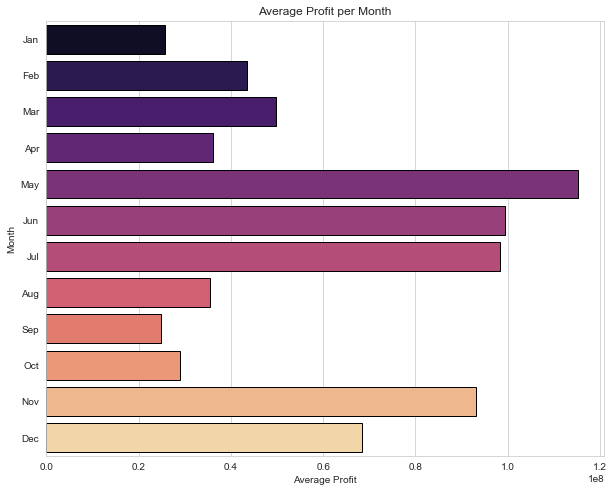

In [58]:
plt.figure(figsize = (10, 8))
sns.set_style(style = 'whitegrid')
sns.barplot(x = 'profit', y = 'month_name', data = df3_months, palette = 'magma', edgecolor = 'black')
plt.xlabel('Average Profit')
plt.ylabel('Month')
plt.title('Average Profit per Month')

plt.savefig('best month release.png')